In [1]:
import pandas as pd

# Load the Excel file
file_path = "Data/6. informations_households.csv"  # Replace with your file path
informations_households = pd.read_csv(file_path)

# Display the first few rows
print(informations_households.head())

       LCLid stdorToU    Acorn Acorn_grouped     file
0  MAC005492      ToU   ACORN-        ACORN-  block_0
1  MAC001074      ToU   ACORN-        ACORN-  block_0
2  MAC000002      Std  ACORN-A      Affluent  block_0
3  MAC003613      Std  ACORN-A      Affluent  block_0
4  MAC003597      Std  ACORN-A      Affluent  block_0


In [2]:
import pandas as pd

# Load the Excel file
file_path = "Data/2. halfhourly_dataset.csv"  # Replace with your file path
halfhourly = pd.read_csv(file_path)

# Display the first few rows
print(halfhourly.head())

       LCLid                         tstp energy(kWh/hh)
0  MAC000002  2012-10-12 00:30:00.0000000             0 
1  MAC000002  2012-10-12 01:00:00.0000000             0 
2  MAC000002  2012-10-12 01:30:00.0000000             0 
3  MAC000002  2012-10-12 02:00:00.0000000             0 
4  MAC000002  2012-10-12 02:30:00.0000000             0 


In [3]:
merged_df = pd.merge(halfhourly, informations_households.drop(columns=["file"]), on="LCLid", how="inner")

merged_df.head()

,LCLid,tstp,energy(kWh/hh),stdorToU,Acorn,Acorn_grouped
0,MAC000002,2012-10-12 00:30:00.0000000,0,Std,ACORN-A,Affluent
1,MAC000002,2012-10-12 01:00:00.0000000,0,Std,ACORN-A,Affluent
2,MAC000002,2012-10-12 01:30:00.0000000,0,Std,ACORN-A,Affluent
3,MAC000002,2012-10-12 02:00:00.0000000,0,Std,ACORN-A,Affluent
4,MAC000002,2012-10-12 02:30:00.0000000,0,Std,ACORN-A,Affluent


In [5]:
# Convert 'tstp' to datetime
merged_df["tstp"] = pd.to_datetime(merged_df["tstp"], errors="coerce")

# Filter for January to June 2013
start_date = pd.Timestamp("2013-01-01")
end_date = pd.Timestamp("2013-07-01")
filtered_df = merged_df[(merged_df["tstp"] >= start_date) & (merged_df["tstp"] < end_date)]

# Extract the time of day from the 'tstp' column (remove date part)
filtered_df["time_of_day"] = filtered_df["tstp"].dt.strftime('%H:%M')  # Format as HH:MM

# Convert 'energy(kWh/hh)' to numeric
filtered_df["energy(kWh/hh)"] = pd.to_numeric(filtered_df["energy(kWh/hh)"], errors="coerce")

filtered_df.head()

/var/folders/qf/cb8mfdbx0f18hx0lw712nq2w0000gn/T/ipykernel_2525/3135290499.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["time_of_day"] = filtered_df["tstp"].dt.strftime('%H:%M')  # Format as HH:MM
/var/folders/qf/cb8mfdbx0f18hx0lw712nq2w0000gn/T/ipykernel_2525/3135290499.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["energy(kWh/hh)"] = pd.to_numeric(filtered_df["energy(kWh/hh)"], errors="coerce")


,LCLid,tstp,energy(kWh/hh),stdorToU,Acorn,Acorn_grouped,time_of_day
3837,MAC000002,2013-01-01 00:00:00,0.219,Std,ACORN-A,Affluent,00:00
3838,MAC000002,2013-01-01 00:30:00,0.241,Std,ACORN-A,Affluent,00:30
3839,MAC000002,2013-01-01 01:00:00,0.191,Std,ACORN-A,Affluent,01:00
3840,MAC000002,2013-01-01 01:30:00,0.235,Std,ACORN-A,Affluent,01:30
3841,MAC000002,2013-01-01 02:00:00,0.182,Std,ACORN-A,Affluent,02:00


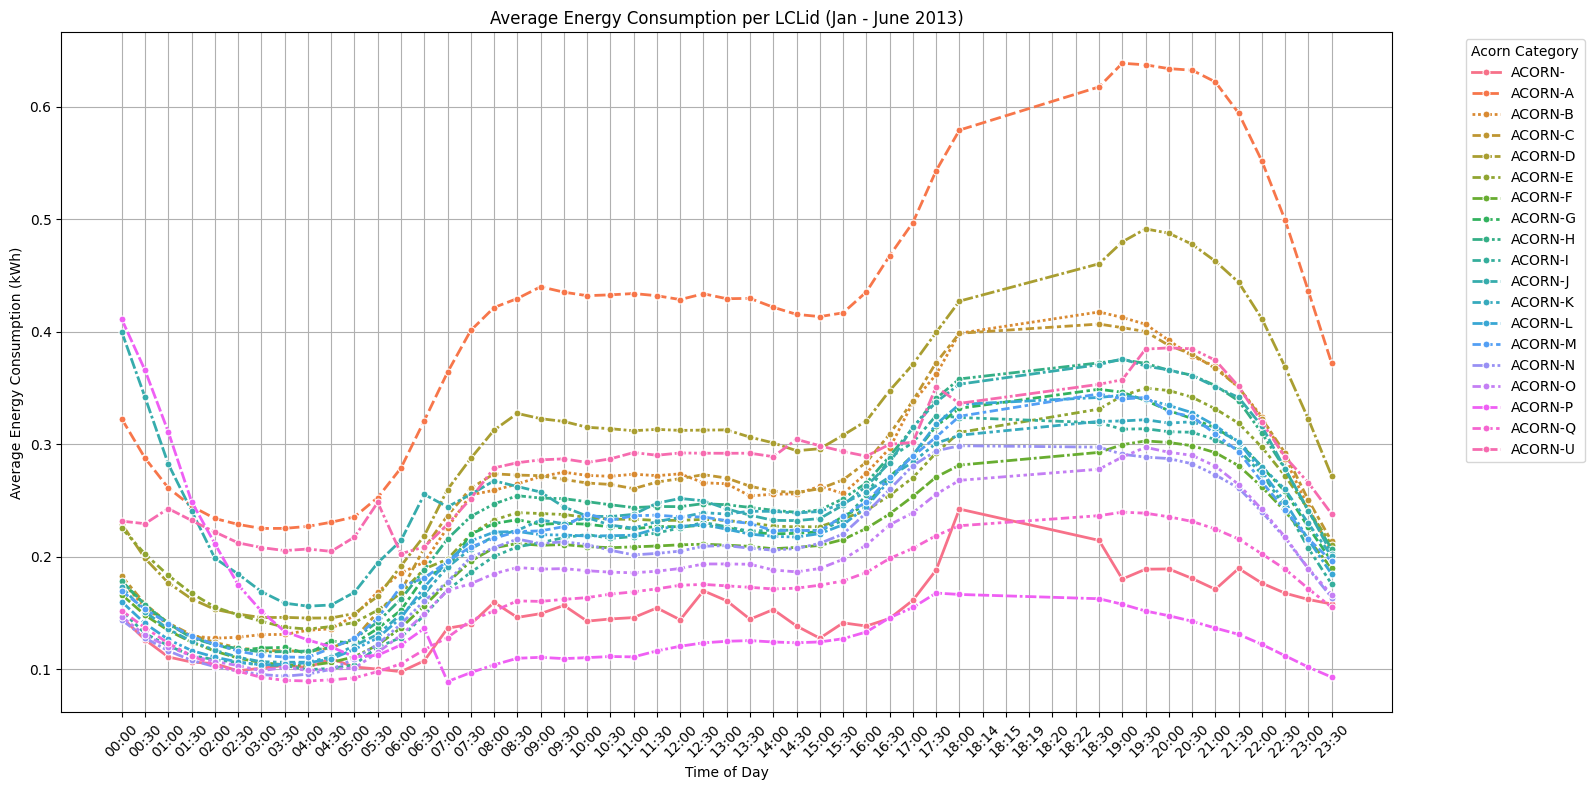

In [7]:
# by acorn 

import seaborn as sns
import matplotlib.pyplot as plt

# Group by time of day and Acorn category, then compute average energy per LCLid
avg_energy_time = (
    filtered_df.groupby([filtered_df["time_of_day"], "Acorn"])["energy(kWh/hh)"]
    .mean()
    .reset_index()
)

# Increase figure size
plt.figure(figsize=(16, 8))

# Use line styles and markers for better differentiation
sns.lineplot(data=avg_energy_time, x="time_of_day", y="energy(kWh/hh)", hue="Acorn", 
             marker="o", style="Acorn", linewidth=2, markersize=5)

# Customize line colors, markers, and styles
sns.set_palette("tab20")  # You can also use other palettes like "deep", "muted", etc.

# Formatting
plt.xlabel("Time of Day")
plt.ylabel("Average Energy Consumption (kWh)")
plt.title("Average Energy Consumption per LCLid (Jan - June 2013)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust legend
plt.legend(title="Acorn Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add gridlines for readability
plt.grid(True)

# Show plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


/var/folders/qf/cb8mfdbx0f18hx0lw712nq2w0000gn/T/ipykernel_2525/1171047241.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Acorn_Grouped"] = filtered_df["Acorn"].map(acorn_mapping)
/var/folders/qf/cb8mfdbx0f18hx0lw712nq2w0000gn/T/ipykernel_2525/1171047241.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["time_of_day"] = filtered_df["tstp"].dt.strftime('%H:%M')


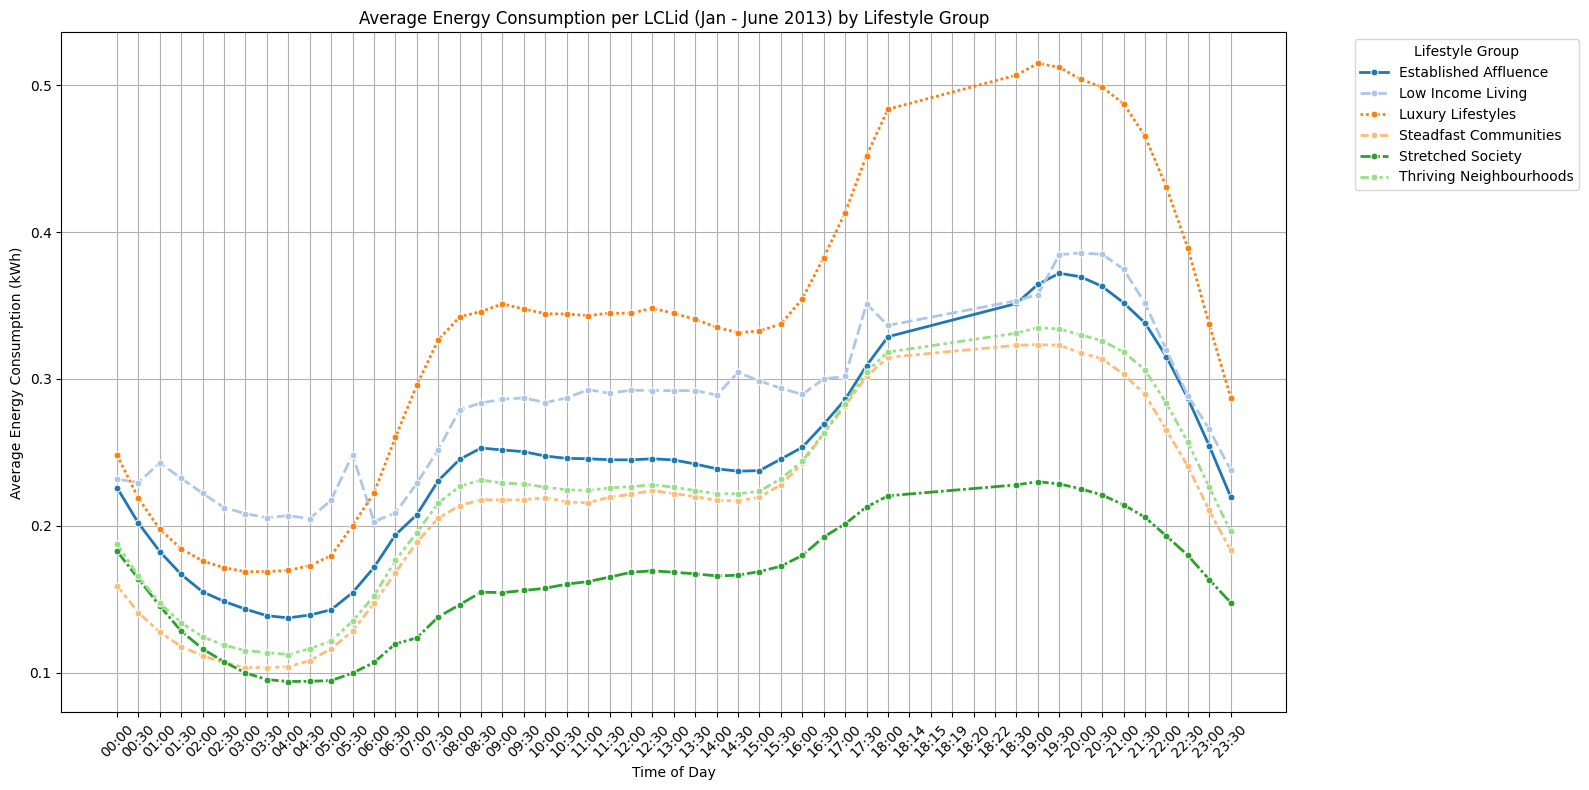

In [ ]:
# by acorn category

import seaborn as sns
import matplotlib.pyplot as plt

# Mapping of Acorn categories to broader lifestyle groups
acorn_mapping = {
    'ACORN-A': 'Luxury Lifestyles', 'ACORN-B': 'Luxury Lifestyles', 'ACORN-C': 'Luxury Lifestyles',
    'ACORN-D': 'Established Affluence', 'ACORN-E': 'Established Affluence',
    'ACORN-F': 'Thriving Neighbourhoods', 'ACORN-G': 'Thriving Neighbourhoods', 'ACORN-H': 'Thriving Neighbourhoods',
    'ACORN-I': 'Thriving Neighbourhoods', 'ACORN-J': 'Thriving Neighbourhoods',
    'ACORN-K': 'Steadfast Communities', 'ACORN-L': 'Steadfast Communities', 'ACORN-M': 'Steadfast Communities',
    'ACORN-N': 'Steadfast Communities', 'ACORN-O': 'Steadfast Communities',
    'ACORN-P': 'Stretched Society', 'ACORN-Q': 'Stretched Society', 'ACORN-R': 'Stretched Society',
    'ACORN-S': 'Low Income Living', 'ACORN-T': 'Low Income Living', 'ACORN-U': 'Low Income Living'
}

# Add the 'Acorn_Grouped' column based on the mapping
filtered_df["Acorn_Grouped"] = filtered_df["Acorn"].map(acorn_mapping)

# Group by time of day and the new 'Acorn_Grouped', then compute average energy
avg_energy_grouped = (
    filtered_df.groupby([filtered_df["time_of_day"], "Acorn_Grouped"])["energy(kWh/hh)"]
    .mean()
    .reset_index()
)

# Increase figure size
plt.figure(figsize=(16, 8))

# Use line styles and markers for better differentiation
sns.lineplot(data=avg_energy_grouped, x="time_of_day", y="energy(kWh/hh)", hue="Acorn_Grouped", 
             marker="o", style="Acorn_Grouped", linewidth=2, markersize=5)

# Customize line colors, markers, and styles
sns.set_palette("tab20")  # You can also use other palettes like "deep", "muted", etc.

# Formatting
plt.xlabel("Time of Day")
plt.ylabel("Average Energy Consumption (kWh)")
plt.title("Average Energy Consumption per LCLid (Jan - June 2013) by Lifestyle Group")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust legend
plt.legend(title="Lifestyle Group", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add gridlines for readability
plt.grid(True)

# Show plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


/var/folders/qf/cb8mfdbx0f18hx0lw712nq2w0000gn/T/ipykernel_2525/3304448777.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Acorn_Grouped"] = filtered_df["Acorn"].map(acorn_mapping)
/var/folders/qf/cb8mfdbx0f18hx0lw712nq2w0000gn/T/ipykernel_2525/3304448777.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["time_of_day"] = filtered_df["tstp"].dt.strftime('%H:%M')


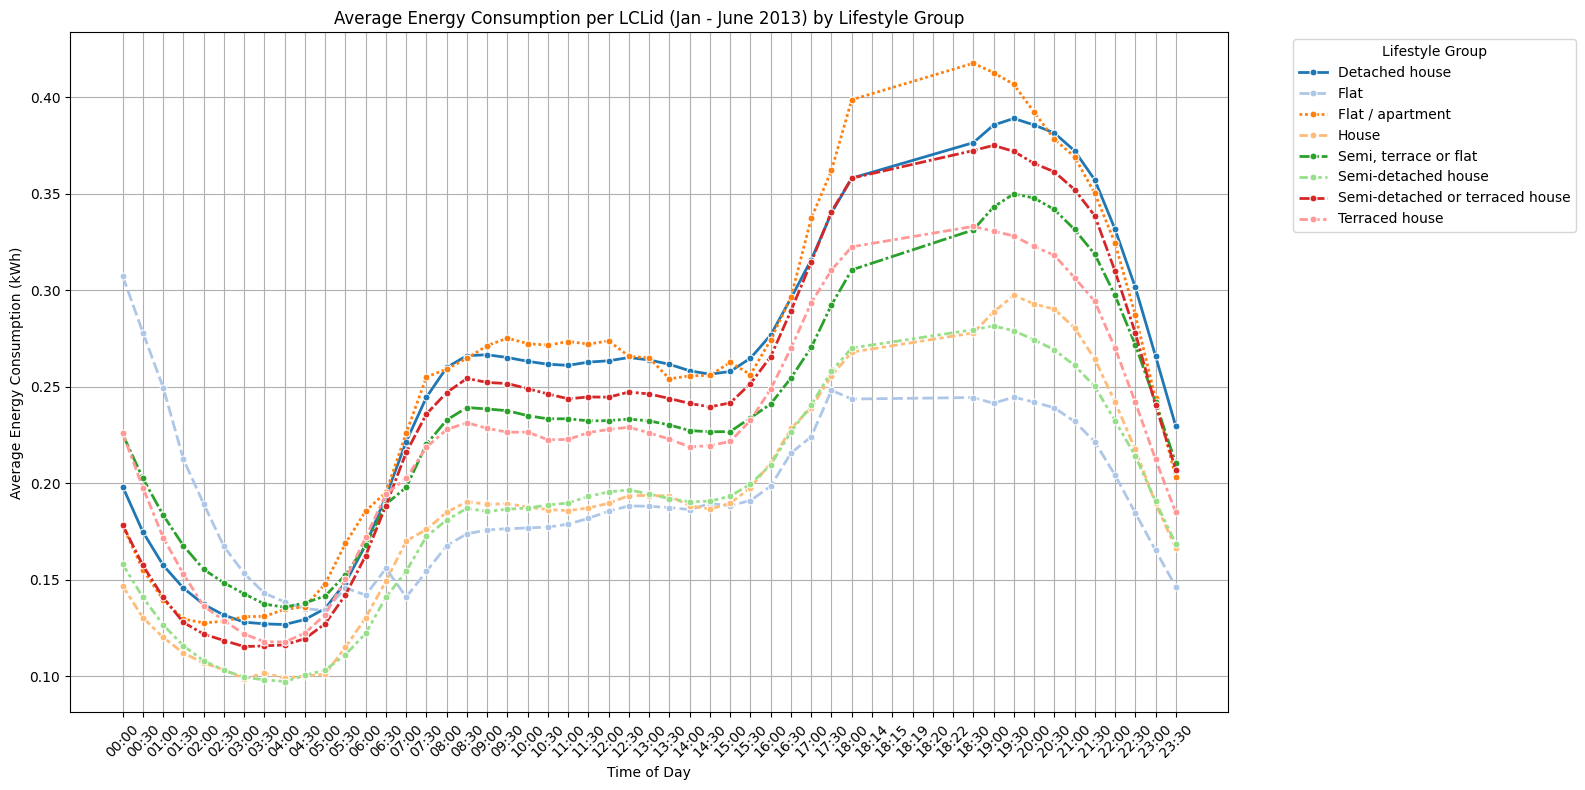

In [9]:
# by housing type

import seaborn as sns
import matplotlib.pyplot as plt

# Mapping of Acorn categories to broader lifestyle groups
acorn_mapping = {
    'ACORN-A': 'Detached house', 'ACORN-B': 'Flat / apartment', 'ACORN-C': 'Detached house',
    'ACORN-D': 'Detached house', 'ACORN-E': 'Semi, terrace or flat',
    'ACORN-F': 'Detached house', 'ACORN-G': 'Semi-detached house', 'ACORN-H': 'Semi-detached or terraced house',
    'ACORN-I': 'Flat', 'ACORN-J': 'Terraced house',
    'ACORN-K': 'Detached house', 'ACORN-L': 'Semi-detached house', 'ACORN-M': 'Terraced house',
    'ACORN-N': 'Terraced house', 'ACORN-O': 'House',
    'ACORN-P': 'Flat', 'ACORN-Q': 'Semi-detached house', 'ACORN-R': 'Terraced house',
    'ACORN-S': 'Terraced house', 'ACORN-T': 'Flat or bungalow', 'ACORN-U': 'Flat'
}

# Add the 'Acorn_Grouped' column based on the mapping
filtered_df["Acorn_Grouped"] = filtered_df["Acorn"].map(acorn_mapping)

# Group by time of day and the new 'Acorn_Grouped', then compute average energy
avg_energy_grouped = (
    filtered_df.groupby([filtered_df["time_of_day"], "Acorn_Grouped"])["energy(kWh/hh)"]
    .mean()
    .reset_index()
)

# Increase figure size
plt.figure(figsize=(16, 8))

# Use line styles and markers for better differentiation
sns.lineplot(data=avg_energy_grouped, x="time_of_day", y="energy(kWh/hh)", hue="Acorn_Grouped", 
             marker="o", style="Acorn_Grouped", linewidth=2, markersize=5)

# Customize line colors, markers, and styles
sns.set_palette("tab20")  # You can also use other palettes like "deep", "muted", etc.

# Formatting
plt.xlabel("Time of Day")
plt.ylabel("Average Energy Consumption (kWh)")
plt.title("Average Energy Consumption per LCLid (Jan - June 2013) by Lifestyle Group")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust legend
plt.legend(title="Lifestyle Group", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add gridlines for readability
plt.grid(True)

# Show plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


/var/folders/qf/cb8mfdbx0f18hx0lw712nq2w0000gn/T/ipykernel_2525/2174840555.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Acorn_Grouped"] = filtered_df["Acorn"].map(acorn_mapping)


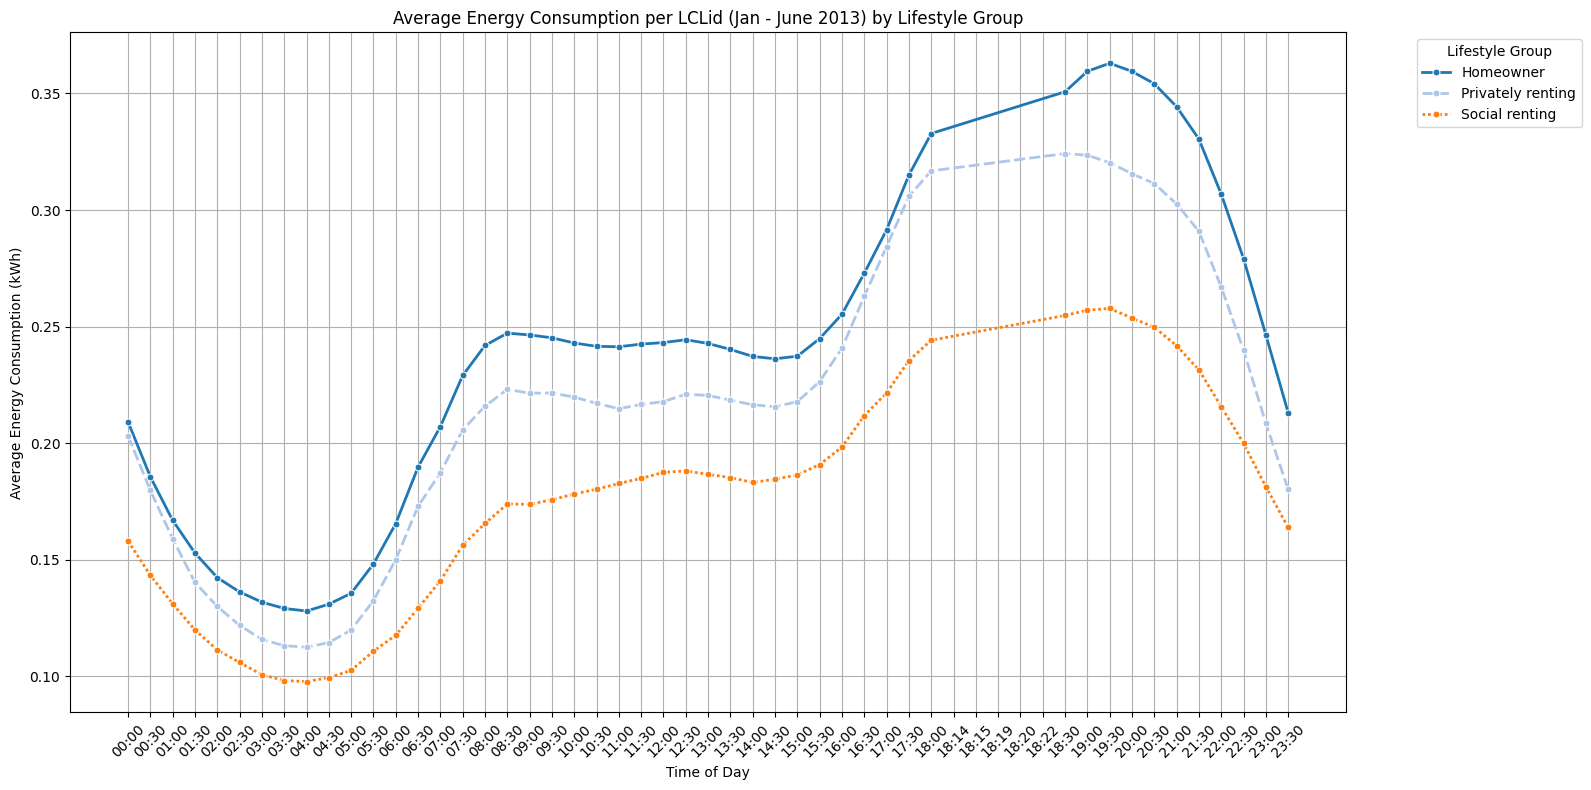

In [10]:
# by house tenure

import seaborn as sns
import matplotlib.pyplot as plt

# Mapping of Acorn categories to broader lifestyle groups
acorn_mapping = {
    'ACORN-A': 'Homeowner', 'ACORN-B': 'Homeowner', 'ACORN-C': 'Homeowner',
    'ACORN-D': 'Homeowner', 'ACORN-E': 'Homeowner',
    'ACORN-F': 'Homeowner', 'ACORN-G': 'Homeowner', 'ACORN-H': 'Privately renting',
    'ACORN-I': 'Privately renting', 'ACORN-J': 'Homeowner',
    'ACORN-K': 'Homeowner', 'ACORN-L': 'Homeowner', 'ACORN-M': 'Social renting',
    'ACORN-N': 'Privately renting', 'ACORN-O': 'Homeowner',
    'ACORN-P': 'Privately renting', 'ACORN-Q': 'Social renting', 'ACORN-R': 'Social renting',
    'ACORN-S': 'Social renting', 'ACORN-T': 'Social renting', 'ACORN-U': 'Social renting'
}

# Add the 'Acorn_Grouped' column based on the mapping
filtered_df["Acorn_Grouped"] = filtered_df["Acorn"].map(acorn_mapping)

# Group by time of day and the new 'Acorn_Grouped', then compute average energy
avg_energy_grouped = (
    filtered_df.groupby([filtered_df["time_of_day"], "Acorn_Grouped"])["energy(kWh/hh)"]
    .mean()
    .reset_index()
)

# Increase figure size
plt.figure(figsize=(16, 8))

# Use line styles and markers for better differentiation
sns.lineplot(data=avg_energy_grouped, x="time_of_day", y="energy(kWh/hh)", hue="Acorn_Grouped", 
             marker="o", style="Acorn_Grouped", linewidth=2, markersize=5)

# Customize line colors, markers, and styles
sns.set_palette("tab20")  # You can also use other palettes like "deep", "muted", etc.

# Formatting
plt.xlabel("Time of Day")
plt.ylabel("Average Energy Consumption (kWh)")
plt.title("Average Energy Consumption per LCLid (Jan - June 2013) by Lifestyle Group")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust legend
plt.legend(title="Lifestyle Group", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add gridlines for readability
plt.grid(True)

# Show plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


/var/folders/qf/cb8mfdbx0f18hx0lw712nq2w0000gn/T/ipykernel_2525/1939433163.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Acorn_Grouped"] = filtered_df["Acorn"].map(acorn_mapping)


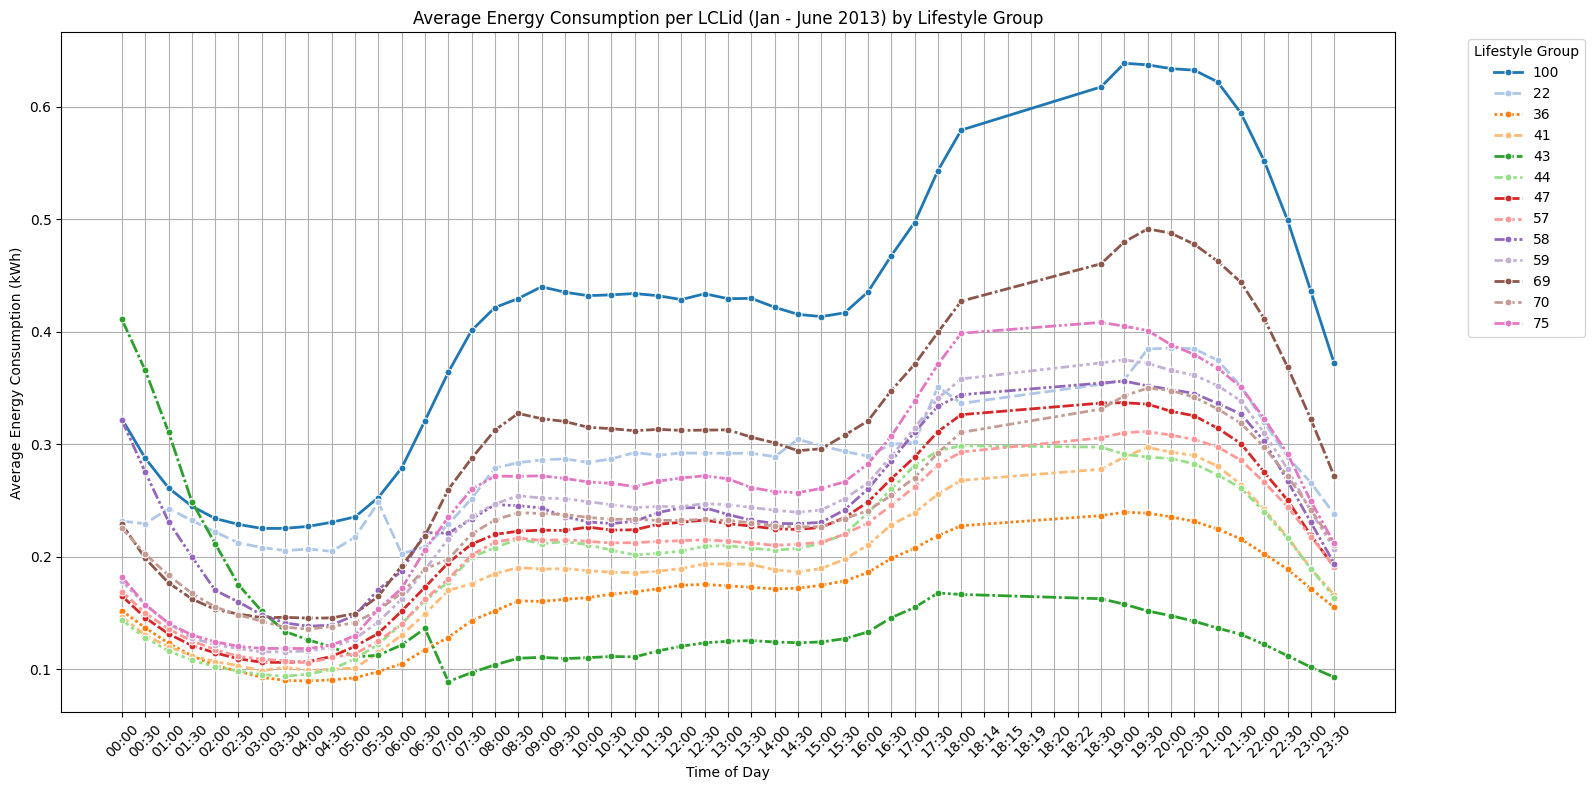

In [11]:
# by income

import seaborn as sns
import matplotlib.pyplot as plt

# Mapping of Acorn categories to broader lifestyle groups
acorn_mapping = {
    'ACORN-A': '100', 'ACORN-B': '75', 'ACORN-C': '75',
    'ACORN-D': '69', 'ACORN-E': '70',
    'ACORN-F': '57', 'ACORN-G': '57', 'ACORN-H': '59',
    'ACORN-I': '58', 'ACORN-J': '58',
    'ACORN-K': '47', 'ACORN-L': '47', 'ACORN-M': '47',
    'ACORN-N': '44', 'ACORN-O': '41',
    'ACORN-P': '43', 'ACORN-Q': '36', 'ACORN-R': '37',
    'ACORN-S': '29', 'ACORN-T': '24', 'ACORN-U': '22'
}

# Add the 'Acorn_Grouped' column based on the mapping
filtered_df["Acorn_Grouped"] = filtered_df["Acorn"].map(acorn_mapping)

# Group by time of day and the new 'Acorn_Grouped', then compute average energy
avg_energy_grouped = (
    filtered_df.groupby([filtered_df["time_of_day"], "Acorn_Grouped"])["energy(kWh/hh)"]
    .mean()
    .reset_index()
)

# Increase figure size
plt.figure(figsize=(16, 8))

# Use line styles and markers for better differentiation
sns.lineplot(data=avg_energy_grouped, x="time_of_day", y="energy(kWh/hh)", hue="Acorn_Grouped", 
             marker="o", style="Acorn_Grouped", linewidth=2, markersize=5)

# Customize line colors, markers, and styles
sns.set_palette("tab20")  # You can also use other palettes like "deep", "muted", etc.

# Formatting
plt.xlabel("Time of Day")
plt.ylabel("Average Energy Consumption (kWh)")
plt.title("Average Energy Consumption per LCLid (Jan - June 2013) by Lifestyle Group")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust legend
plt.legend(title="Lifestyle Group", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add gridlines for readability
plt.grid(True)

# Show plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


/var/folders/qf/cb8mfdbx0f18hx0lw712nq2w0000gn/T/ipykernel_2525/2733652023.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Income_Level"] = filtered_df["Acorn"].map(acorn_mapping)
/var/folders/qf/cb8mfdbx0f18hx0lw712nq2w0000gn/T/ipykernel_2525/2733652023.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Income_Grouped"] = filtered_df["Income_Level"].map(income_groups)


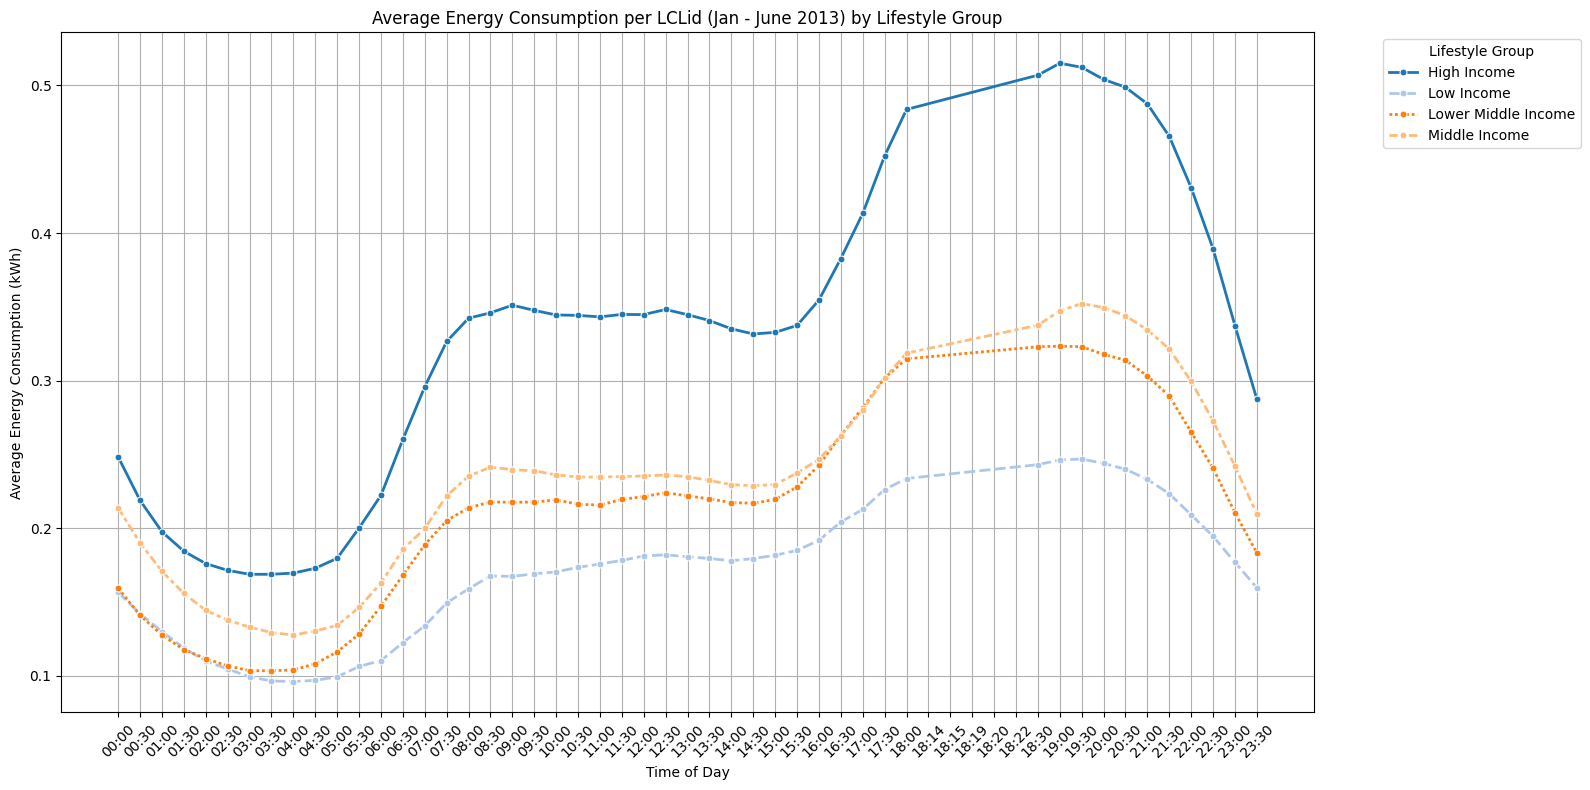

In [12]:
# by house tenure

import seaborn as sns
import matplotlib.pyplot as plt

# Mapping of Acorn categories to broader lifestyle groups
acorn_mapping = {
    'ACORN-A': '100', 'ACORN-B': '75', 'ACORN-C': '75',
    'ACORN-D': '69', 'ACORN-E': '70',
    'ACORN-F': '57', 'ACORN-G': '57', 'ACORN-H': '59',
    'ACORN-I': '58', 'ACORN-J': '58',
    'ACORN-K': '47', 'ACORN-L': '47', 'ACORN-M': '47',
    'ACORN-N': '44', 'ACORN-O': '41',
    'ACORN-P': '43', 'ACORN-Q': '36', 'ACORN-R': '37',
    'ACORN-S': '29', 'ACORN-T': '24', 'ACORN-U': '22'
}

income_groups = {
    '100': 'High Income', '75': 'High Income',
    '70': 'Middle Income', '69': 'Middle Income', '58': 'Middle Income', '57': 'Middle Income',
    '47': 'Lower Middle Income', '44': 'Lower Middle Income', '41': 'Lower Middle Income',
    '36': 'Low Income', '37': 'Low Income', '29': 'Low Income', '24': 'Low Income', '22': 'Low Income'
}


# Add the 'Acorn_Grouped' column based on the mapping
filtered_df["Income_Level"] = filtered_df["Acorn"].map(acorn_mapping)

# Add the 'Income_Grouped' column based on the mapping
filtered_df["Income_Grouped"] = filtered_df["Income_Level"].map(income_groups)

# Group by time of day and the new 'Acorn_Grouped', then compute average energy
avg_energy_grouped = (
    filtered_df.groupby([filtered_df["time_of_day"], "Income_Grouped"])["energy(kWh/hh)"]
    .mean()
    .reset_index()
)

# Increase figure size
plt.figure(figsize=(16, 8))

# Use line styles and markers for better differentiation
sns.lineplot(data=avg_energy_grouped, x="time_of_day", y="energy(kWh/hh)", hue="Income_Grouped", 
             marker="o", style="Income_Grouped", linewidth=2, markersize=5)

# Customize line colors, markers, and styles
sns.set_palette("tab20")  # You can also use other palettes like "deep", "muted", etc.

# Formatting
plt.xlabel("Time of Day")
plt.ylabel("Average Energy Consumption (kWh)")
plt.title("Average Energy Consumption per LCLid (Jan - June 2013) by Lifestyle Group")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust legend
plt.legend(title="Lifestyle Group", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add gridlines for readability
plt.grid(True)

# Show plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()